# Prueba Técnica cientifico de datos: Grupo R5
## Wilmar Sepulveda Herrera

In [1]:
## Cargue de paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Lecura de datos
leads = pd.read_csv("Prueba/Leads.csv")
print(leads.shape)
leads.head()

(392453, 12)


,vehicle_registration,price,percentage_discount,discount_value,price_total_with_discount,price_extra_fee_applied,extra_fee_credit_applied,price_total_with_extra_fee,date,channel,issue,payment_method
0,PGM41F,495900.0,8.01,39700.0,456200.0,0.0,2.25,0.0,2021-07-01-00:01:03,cpc,NaN,NaN
1,MKU62C,495900.0,7.50,37200.0,458700.0,0.0,2.25,0.0,2021-07-01-00:01:28,cpc,NaN,NaN
2,MYU58E,495900.0,0.00,0.0,495900.0,0.0,2.25,0.0,2021-07-01-00:01:40,cpc,NaN,NaN
3,XYC221,497850.0,10.00,49800.0,448050.0,0.0,1.80,448050.0,2021-07-01-00:02:51,organic,NaN,NaN
4,UTY89D,559050.0,8.05,45000.0,514050.0,0.0,0.00,0.0,2021-07-01-00:03:33,renewal,NaN,NaN


In [3]:
## Chekeamos nombre de variables de leads
leads.columns.values.tolist()

['vehicle_registration',
 'price',
 'percentage_discount',
 'discount_value',
 'price_total_with_discount',
 'price_extra_fee_applied',
 'extra_fee_credit_applied',
 'price_total_with_extra_fee',
 'date',
 'channel',
 'issue',
 'payment_method']

In [4]:
car = pd.read_csv("Prueba/car.csv")
print(car.shape)
car.head()

(390208, 3)


,vehicle_registration,vehicle_class,registration_state
0,QMJ43B,MOTOCICLETA,Cundinamarca
1,THK58D,MOTOCICLETA,Antioquia
2,WCD961,AUTOMOVIL,Bogotá d C.
3,MVS140,CAMIONETA,Cundinamarca
4,JVM81C,MOTOCICLETA,Meta


In [5]:
## Chekeamos nombre de variables de car
car.columns.values.tolist()

['vehicle_registration', 'vehicle_class', 'registration_state']

In [6]:
### Uniendo informacion de car y leads
data = leads.merge(car,on = "vehicle_registration",how='inner')
print(data.shape)
data.head()

(392453, 14)


,vehicle_registration,price,percentage_discount,discount_value,price_total_with_discount,price_extra_fee_applied,extra_fee_credit_applied,price_total_with_extra_fee,date,channel,issue,payment_method,vehicle_class,registration_state
0,PGM41F,495900.0,8.01,39700.0,456200.0,0.0,2.25,0.0,2021-07-01-00:01:03,cpc,NaN,NaN,MOTOCICLETA,Antioquia
1,MKU62C,495900.0,7.50,37200.0,458700.0,0.0,2.25,0.0,2021-07-01-00:01:28,cpc,NaN,NaN,MOTOCICLETA,Huila
2,MYU58E,495900.0,0.00,0.0,495900.0,0.0,2.25,0.0,2021-07-01-00:01:40,cpc,NaN,NaN,MOTOCICLETA,Meta
3,XYC221,497850.0,10.00,49800.0,448050.0,0.0,1.80,448050.0,2021-07-01-00:02:51,organic,NaN,NaN,AUTOMOVIL,Bogotá d C.
4,UTY89D,559050.0,8.05,45000.0,514050.0,0.0,0.00,0.0,2021-07-01-00:03:33,renewal,NaN,NaN,MOTOCICLETA,Bogotá d C.


In [7]:
## Miremos las categorías de la varieble issue
data['issue'].unique().tolist()

[nan, 'issue', 'annulment']

* **issue**: Poliza Emitida
* **annulment**: Poliza Anulada
* **NA**: Polizas cotizadas

In [8]:
## Rellenamos los NA con quoted para señalar que ese credito fue solo cotizado
data['issue'].fillna('quoted',inplace=True)

### Verificamos si hay id de creditos repetidos
print('numero de vehiculos unicos ',data['vehicle_registration'].nunique() )

numero de vehiculos unicos  390208


  Se puede observar que la data no tiene valores unicos para los vehiculos, vamos a ver por que, busquemos un vehiculo repetido

In [9]:
ids = data['vehicle_registration'].value_counts()

ids_repeat = ids[ids>1].index
print('numero de vehiculos repetidos ',len(ids_repeat) )
data[data['vehicle_registration'].isin(ids_repeat)]

numero de vehiculos repetidos  2245


,vehicle_registration,price,percentage_discount,discount_value,price_total_with_discount,price_extra_fee_applied,extra_fee_credit_applied,price_total_with_extra_fee,date,channel,issue,payment_method,vehicle_class,registration_state
21,EJC795,435600.0,10.01,43600.0,392000.0,0.00,1.80,392000.00,2021-07-01-00:16:33,cpc,issue,pse,AUTOMOVIL,Cundinamarca
22,EJC795,497850.0,9.04,45000.0,452850.0,0.00,2.25,452850.00,2021-07-03-17:19:36,cpc,issue,pse,AUTOMOVIL,Cundinamarca
176,ENA85F,495900.0,8.01,39700.0,456200.0,0.00,1.80,456200.00,2021-07-01-06:09:50,cpc,issue,pse,MOTOCICLETA,Antioquia
177,ENA85F,495900.0,9.07,45000.0,450900.0,0.00,0.00,0.00,2021-07-05-10:23:08,renewal,quoted,NaN,MOTOCICLETA,Antioquia
266,TOE81D,495900.0,9.07,45000.0,450900.0,0.00,0.00,450900.00,2021-07-01-06:52:13,renewal,issue,pse,MOTOCICLETA,Bogotá d C.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384016,TGD805,328800.0,10.01,32900.0,295900.0,0.00,1.80,295900.00,2021-09-30-08:58:46,cpc,issue,pse,AUTOMOVIL,Cundinamarca
388125,CLW79E,495900.0,11.09,55000.0,440900.0,7936.20,1.80,448836.20,2021-09-30-11:55:02,cpc,issue,efecty,MOTOCICLETA,Cundinamarca
388126,CLW79E,495900.0,10.08,50000.0,445900.0,10032.75,2.25,455932.75,2021-09-30-11:58:21,cpc,issue,efecty,MOTOCICLETA,Cundinamarca
388885,CYB789,497850.0,10.00,49800.0,448050.0,0.00,2.25,0.00,2021-09-30-13:41:00,cpc,quoted,NaN,AUTOMOVIL,Bogotá d C.


Los vehiculos con mediciones repetidas se deben a que algunos emitieron dos polizas, o cotizaron una y compraron otra, para n alterar los datos, no se hara nada de momento con estos registros, con mas conocimiento de negocio se puede generar alguna estrategia para manejar estos vehiculos repetidos en la base de datos.

## Análisis exploratorio de datos
Recordemos que el objetivo es responder el siguiente problema de negocio, ¿de qué manera se
puede distribuir de la manera más óptima el descuento por cada departamento?. Primero hagamos un analisis exploratorio genral de los datos

### Analizando variables categoricas

In [10]:
#Obtengo variables categoricas
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

cat_vars

['vehicle_registration',
 'date',
 'channel',
 'issue',
 'payment_method',
 'vehicle_class',
 'registration_state']

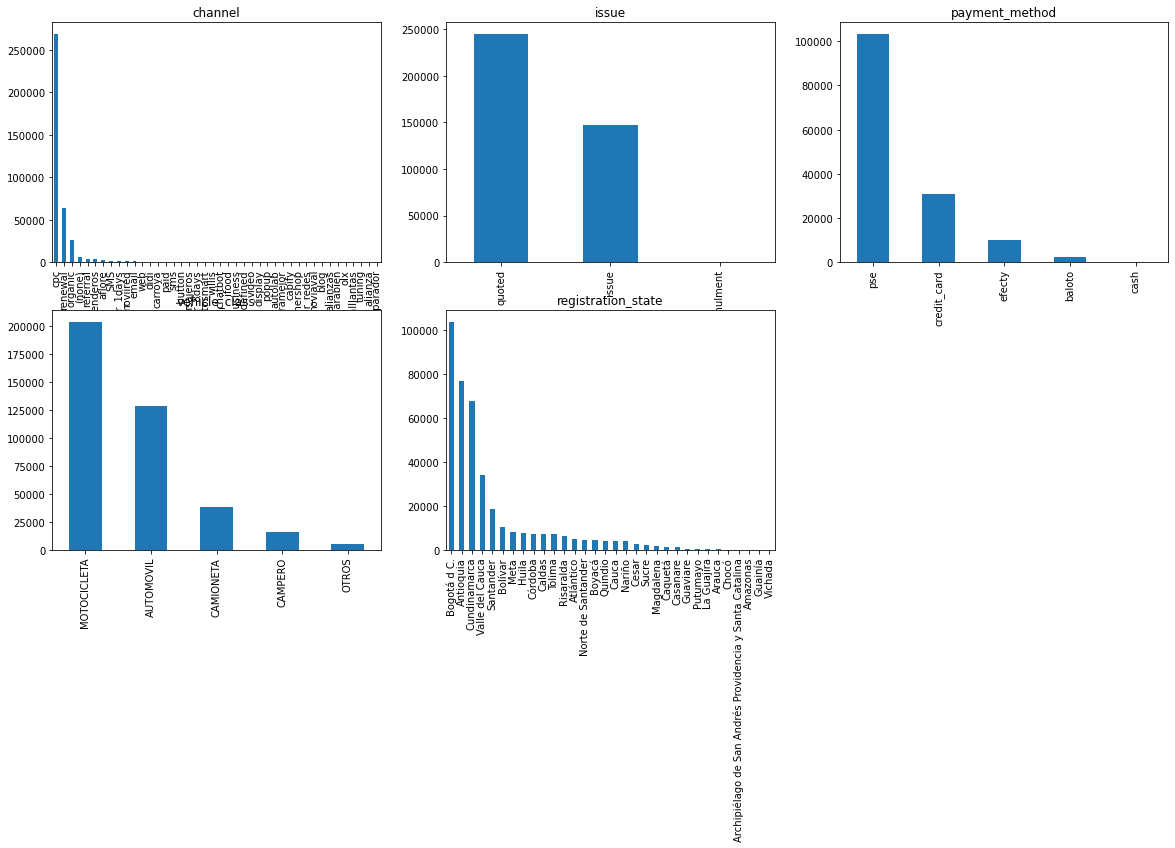

In [11]:
plt.figure(figsize=(20,15))
for i,var in enumerate(cat_vars[2:]):
    plt.subplot(3,3,i+1)
    data[var].value_counts().plot(kind='bar')
    plt.title(var)

La tasa de conversión la defino de la siguiente manera

$$Tc = \frac{PolizasEmitidas}{PolizasEmitidass+ PolizasCotizadas+PolizasAnuladas}$$

Bajo el supuesto de que las polizas anuladas no hacen parte de las polizas emitidas, por tanto no hacen parte del numerador


In [12]:
print('La tasa de conversion de las polizas es: ',"{:.2%}".format((data['issue']=='issue').mean()))

La tasa de conversion de las polizas es:  37.56%


La tasa de conversion nos indica el porcentaje de polizas emitidas del total de polizas emitidas, cotizadas y devueltas

las variables channel y registration state tienen muchas categorias, saquemos un top 10

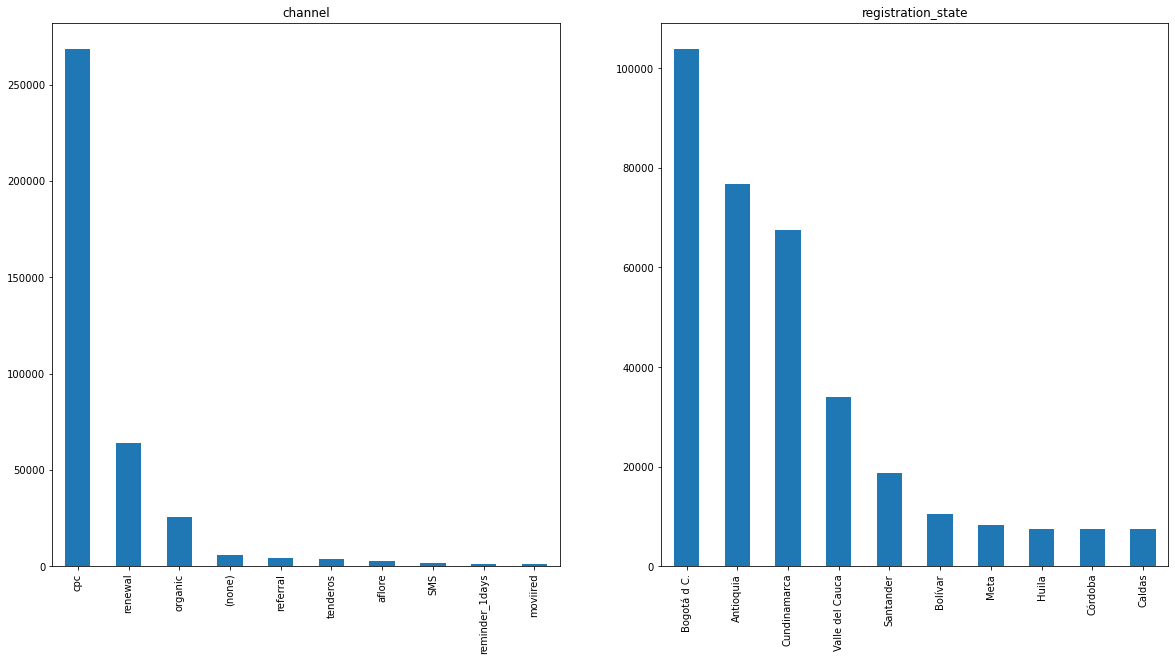

In [13]:
vars_top = ['channel','registration_state']

plt.figure(figsize=(20,10))
for i,var in enumerate(vars_top):
    plt.subplot(1,2,i+1)
    data[var].value_counts()[:10].plot(kind='bar')
    plt.title(var)

Los seguros mas frecuentes en la compañia son seguros de motocicletas y automovil, comprados por PSE principalmente y con tarjeta de credito, los creditos tienen una tasa de conversión del 37.56% y vehiculos principalmente en Bogotá, antioquia, cundinamarca, Valle del Cauca y Santander, es decir, los principales departamentos. 

### Analizando variables numericas

In [14]:
num_vars = [var for var in data.columns if data[var].dtype != 'O']

num_vars

['price',
 'percentage_discount',
 'discount_value',
 'price_total_with_discount',
 'price_extra_fee_applied',
 'extra_fee_credit_applied',
 'price_total_with_extra_fee']

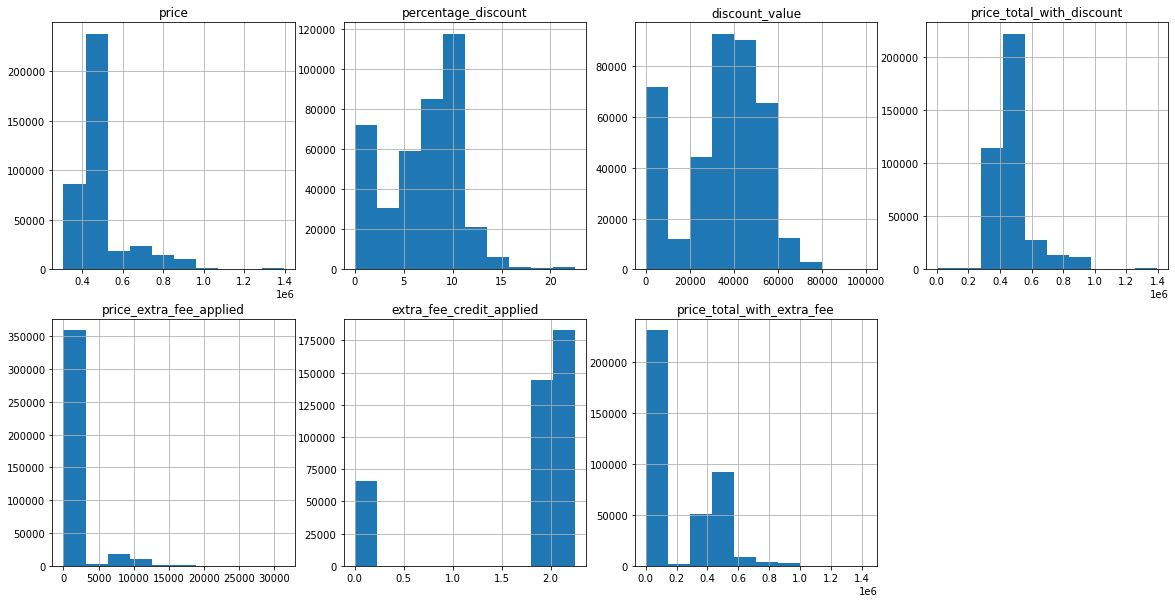

In [15]:
plt.figure(figsize=(20,10))
for i,var in enumerate(num_vars):
    plt.subplot(2,4,i+1)
    data[var].hist()
    plt.title(var)

## Analizando variables por departamento

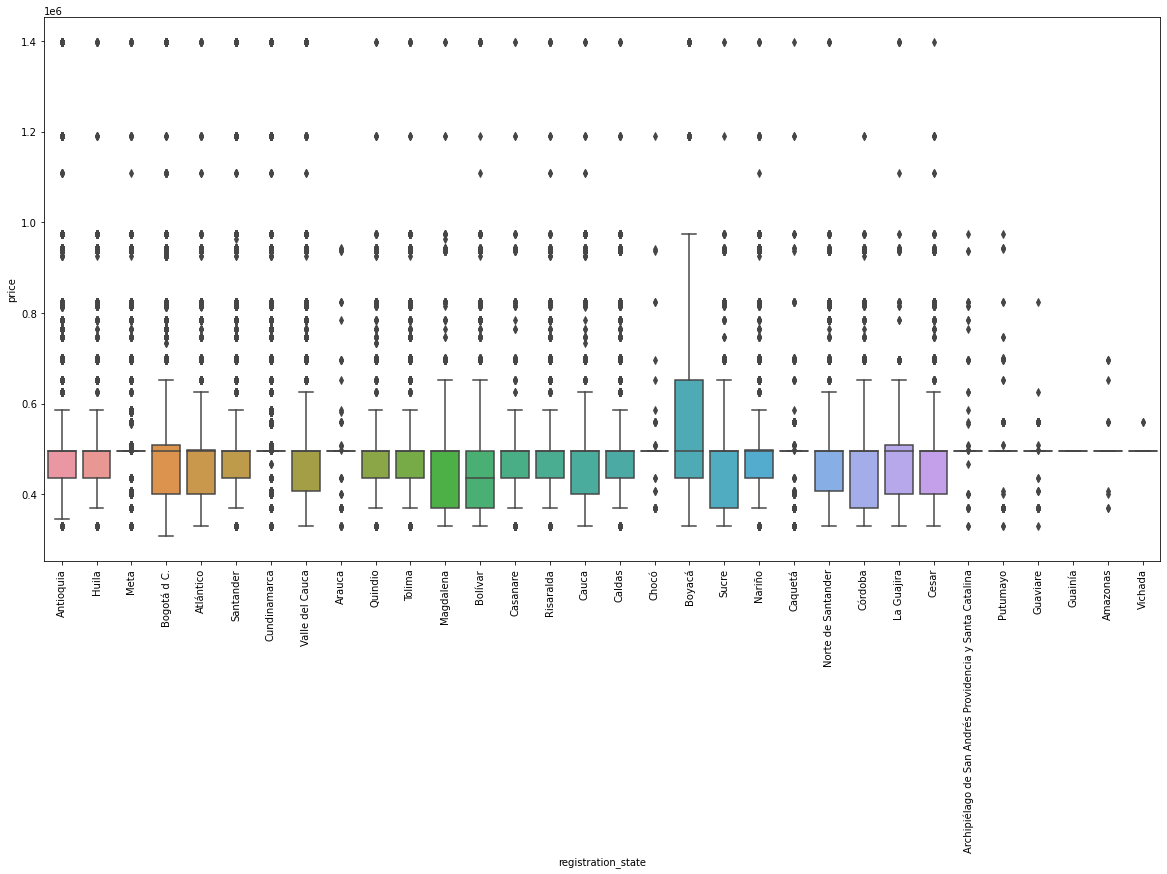

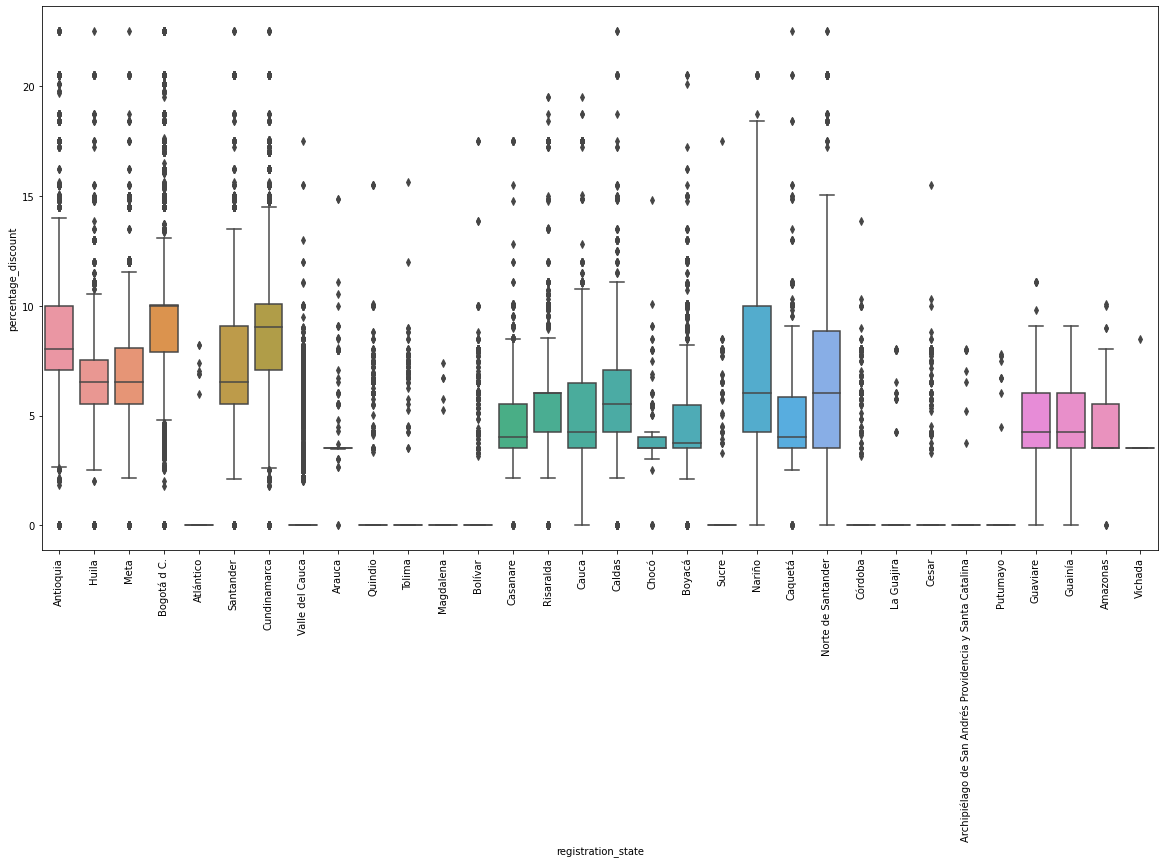

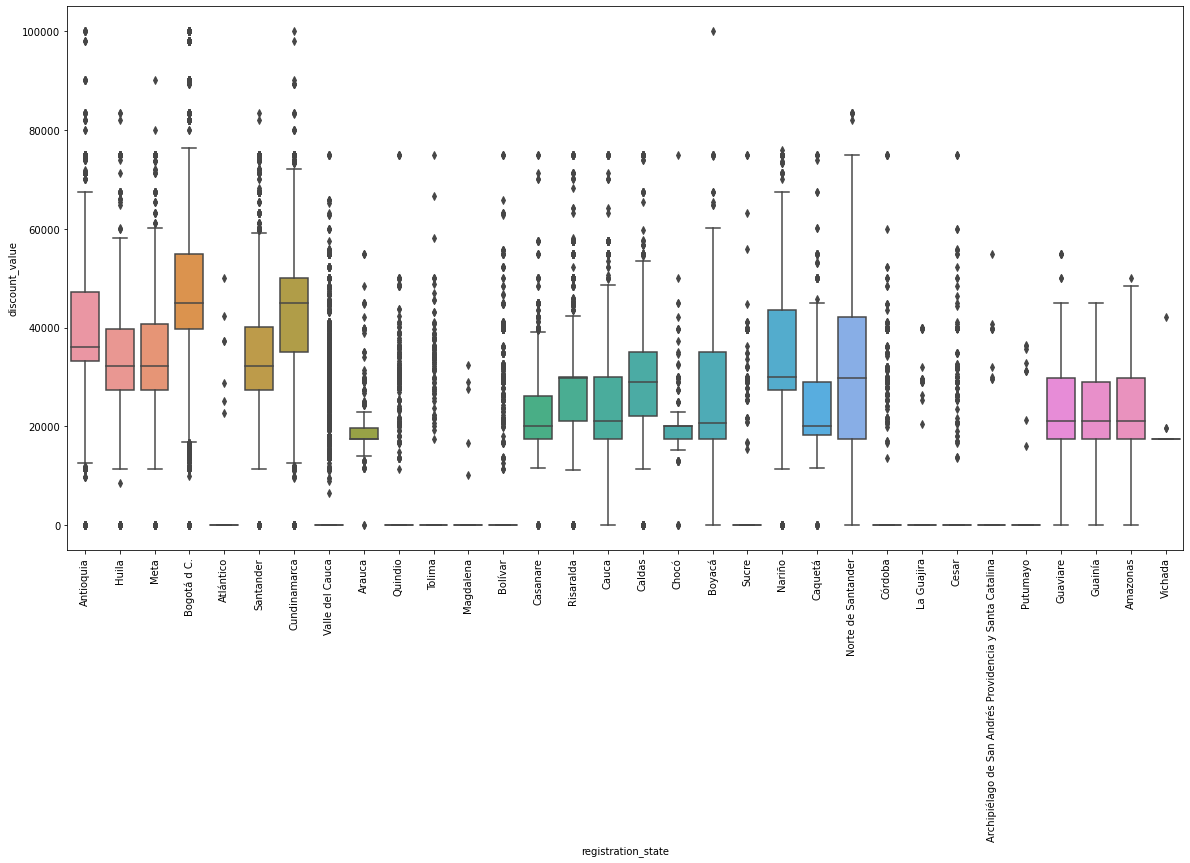

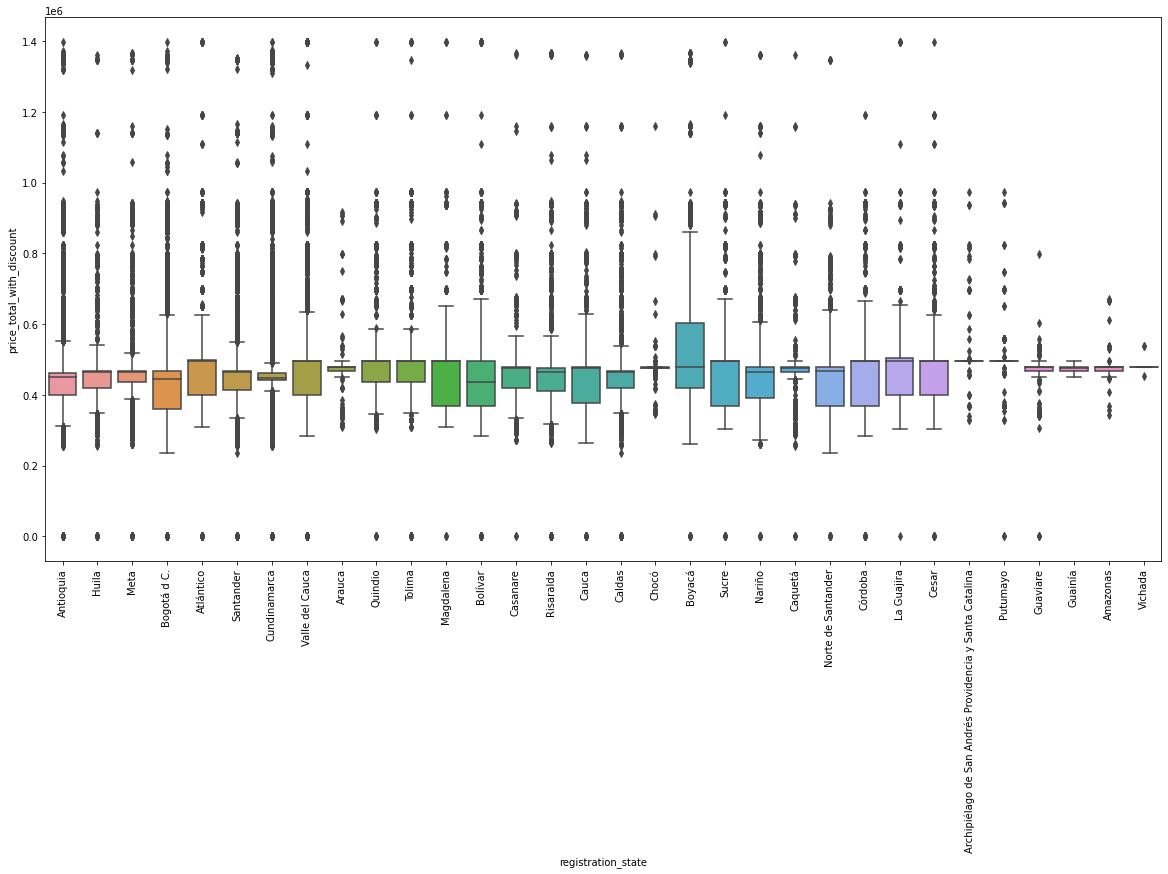

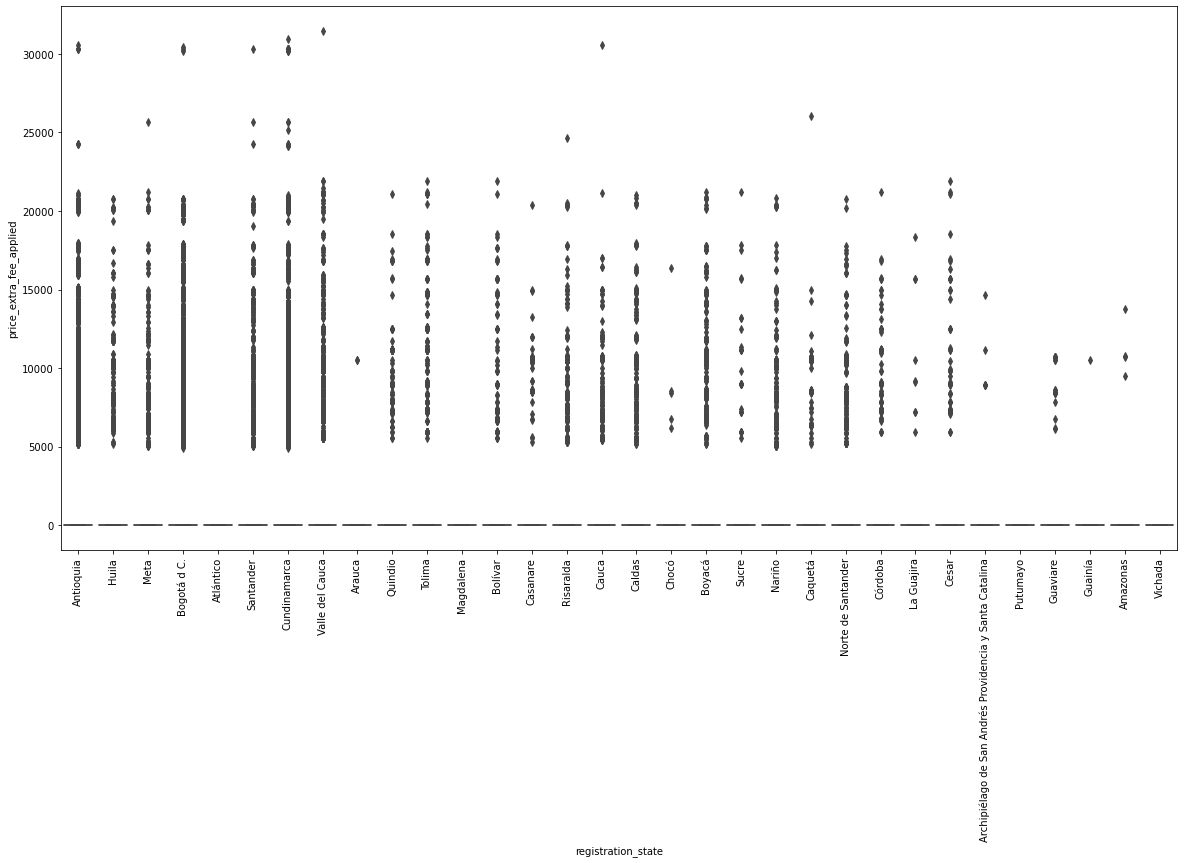

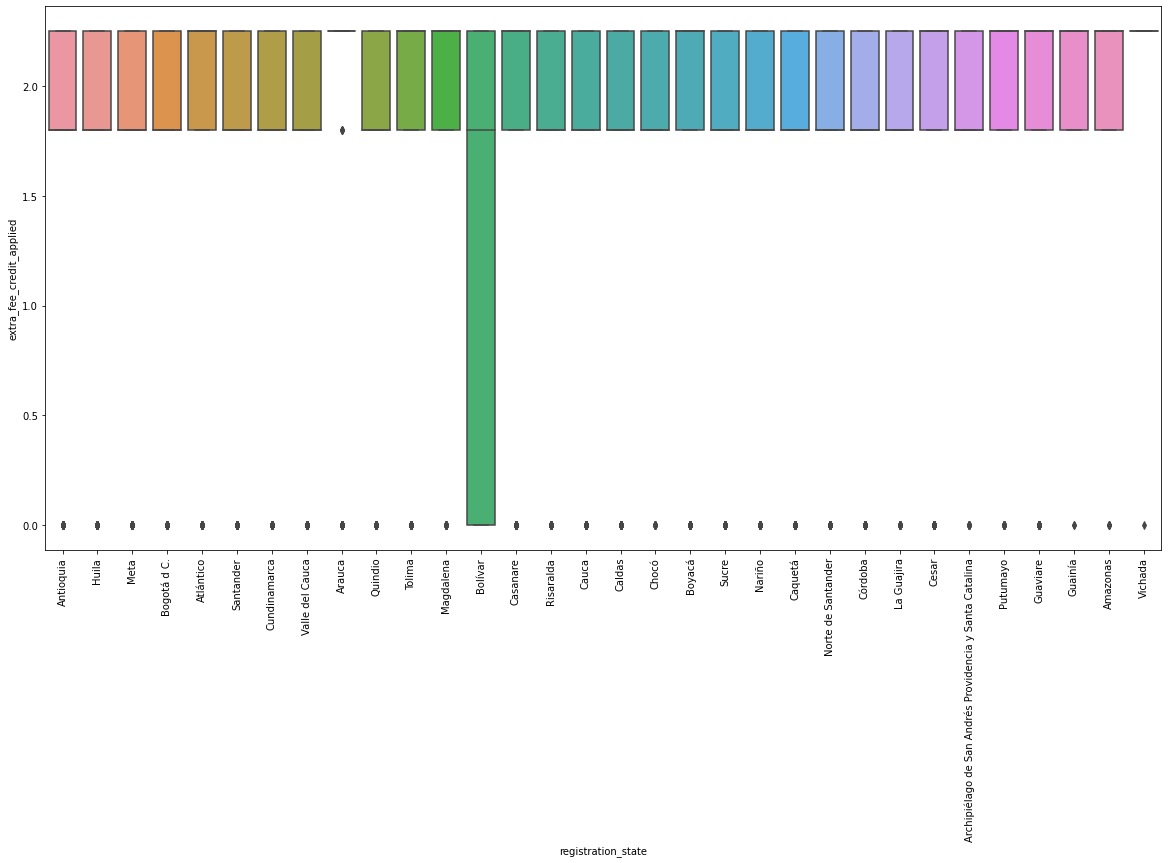

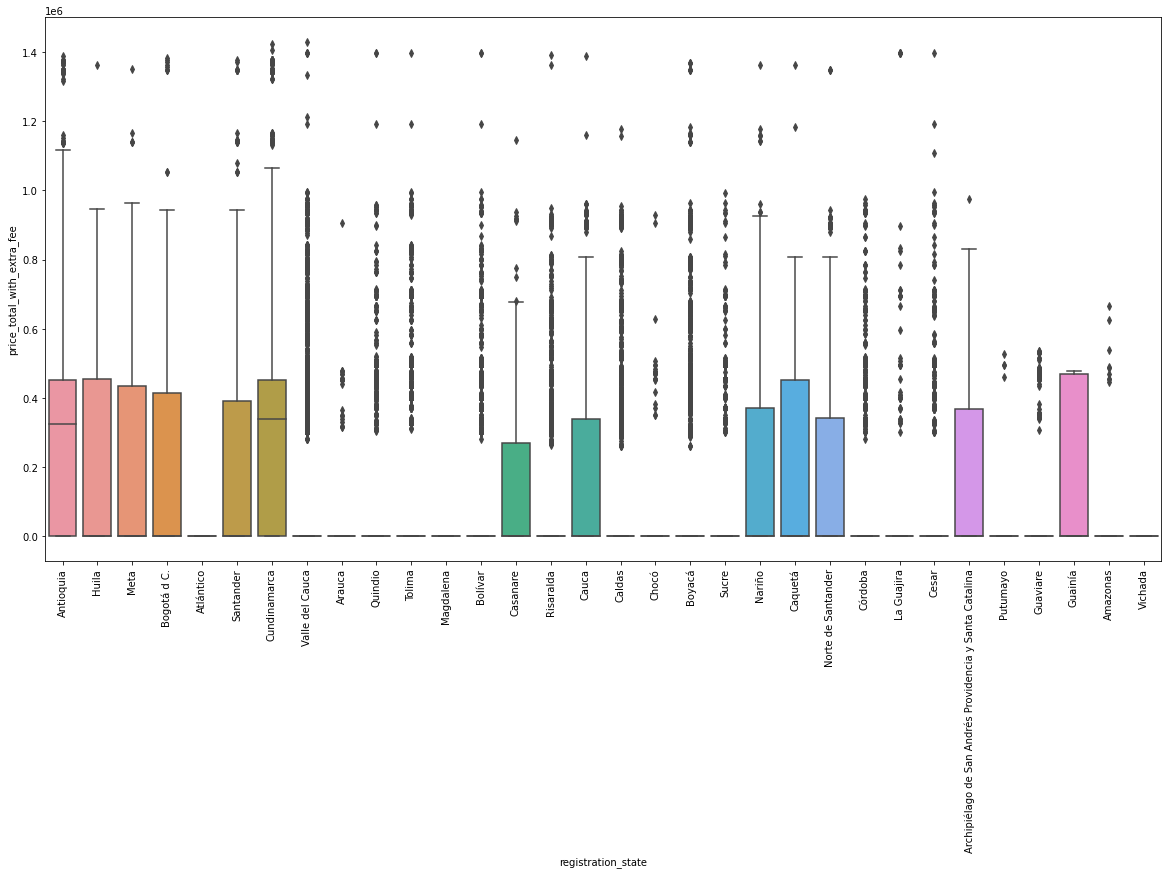

In [16]:
def boxplot_dep(data,var):
    plt.figure(figsize=(20,10))
    plot=sns.boxplot(data=data,x="registration_state",y=var)
    plt.setp(plot.get_xticklabels(), rotation=90)
    plt.show()

for var in num_vars:
    boxplot_dep(data,var)

Se puede observar precios mas elevados de los autos en el departamento de bolivar y pocentajes de descuento mas altos en departamentos como Bogotá, Antioquia, Valle del Cauca y nariño. Porcentaje de descuento bajos en chocó y Boyacá.

### Tasa de conversión por departamento

In [17]:
## Defino una funcion que calcula la tasa de conversión
def tasa_conversion(issue):
    tc = (issue=='issue').mean()
    return tc
#probando nuestra función
tasa_conversion(data["issue"])

0.37558127979656164

In [18]:
##Calculo tasa de conversión por departamento
data.groupby('registration_state')["issue"].apply(tasa_conversion).sort_values(ascending=False)

registration_state
Antioquia                                                  0.497391
Cundinamarca                                               0.487609
Bogotá d C.                                                0.459236
Guainía                                                    0.352941
Meta                                                       0.333694
Huila                                                      0.321844
Nariño                                                     0.319836
Santander                                                  0.314275
Norte de Santander                                         0.290690
Cauca                                                      0.281647
Caquetá                                                    0.279753
Archipiélago de San Andrés Providencia y Santa Catalina    0.231788
Guaviare                                                   0.227357
Casanare                                                   0.215670
Caldas                       

Los departamentos que tienen la mayor tasa de conversión

## Propuesta de aalisis predictivo

Si se quiere encontrar una forma de estimar el porcentaje de descuento por departamento, se puede proponer un modelo de regresión lineal con estos datos historicos, teniendo cómo variable de respuesta el porcentaje de descuento y como covariables, otras variables interesantes de dataset, entre ellas el departamento, esto nos ayudaría a decr cual es el cambio en el porcentaje estimado de decuento para clientes en los diferentes departamentos. 


## Conclusiones
En general, se puede decir que la compañia vende principalmente seguros para motocicleta en los principales departamentos del país, excluyendo el Atlantico, que es un departamento principal pero con poca participación, se podrian realizar estrategias para captar ese mercado de la costa atlantica. Los departamentos que más porcentaje de descuento estan obteniendo son Antioquia, Valle del Cauca y Bogotá, mientras que Arauca y Choco, entre otros, tienen muy bajo porcentaje de descuento. En cuanto a las tasas de conversión Antioquia es el que más realiza compras de seguros con la compañía con casi el 50% de conversión, mientras que el Valle del Cauca, a pesar de ser de los departamentos con mas vehiculos interesados, tiene una tasa de conversión muy baja, se podría indagar mas en la razon por la que esto sucede.